In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import os
import scipy
import scipy.stats as stats
import seaborn as sns
import math 
import matplotlib.animation as animation
import matplotlib.colors as mcol
import matplotlib.cm as cm
import time
import random
import statistics as stat
from scipy.stats import variation
from xml.dom import minidom


from scipy import interpolate
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.collections import PolyCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


plt.style.use('seaborn-pastel')


#plt.rcParams['animation.ffmpeg_path'] = '/opt/local/bin/ffmpeg'
%matplotlib inline
#%matplotlib qt

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [2]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcol.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [3]:
datapath = (f'/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/fullbed-interp/')

hd_xlocs = np.load(f'{datapath}xpos.npy', allow_pickle = True)
hd_ylocs = np.load(f'{datapath}ypos.npy', allow_pickle = True)
hd_depth = np.load(f'{datapath}depth.npy', allow_pickle = True)
hd_velo = np.load(f'{datapath}velocity.npy', allow_pickle = True)

In [4]:
print(hd_xlocs.shape, hd_ylocs.shape, hd_depth.shape, hd_velo.shape)

(705, 1001, 382) (705, 1001, 382) (705, 1001, 382) (705, 1001, 382)


In [5]:
hd_qw = np.multiply(hd_depth, hd_velo)

In [6]:
realtest = ['a75e09', 'cb7723','069af3', '0e87cc', '2242c77', '0504aa','0504aa', '00035b', '020035', '040348'] 

In [7]:
num_timesteps = hd_xlocs.shape[2]

KeyboardInterrupt: 

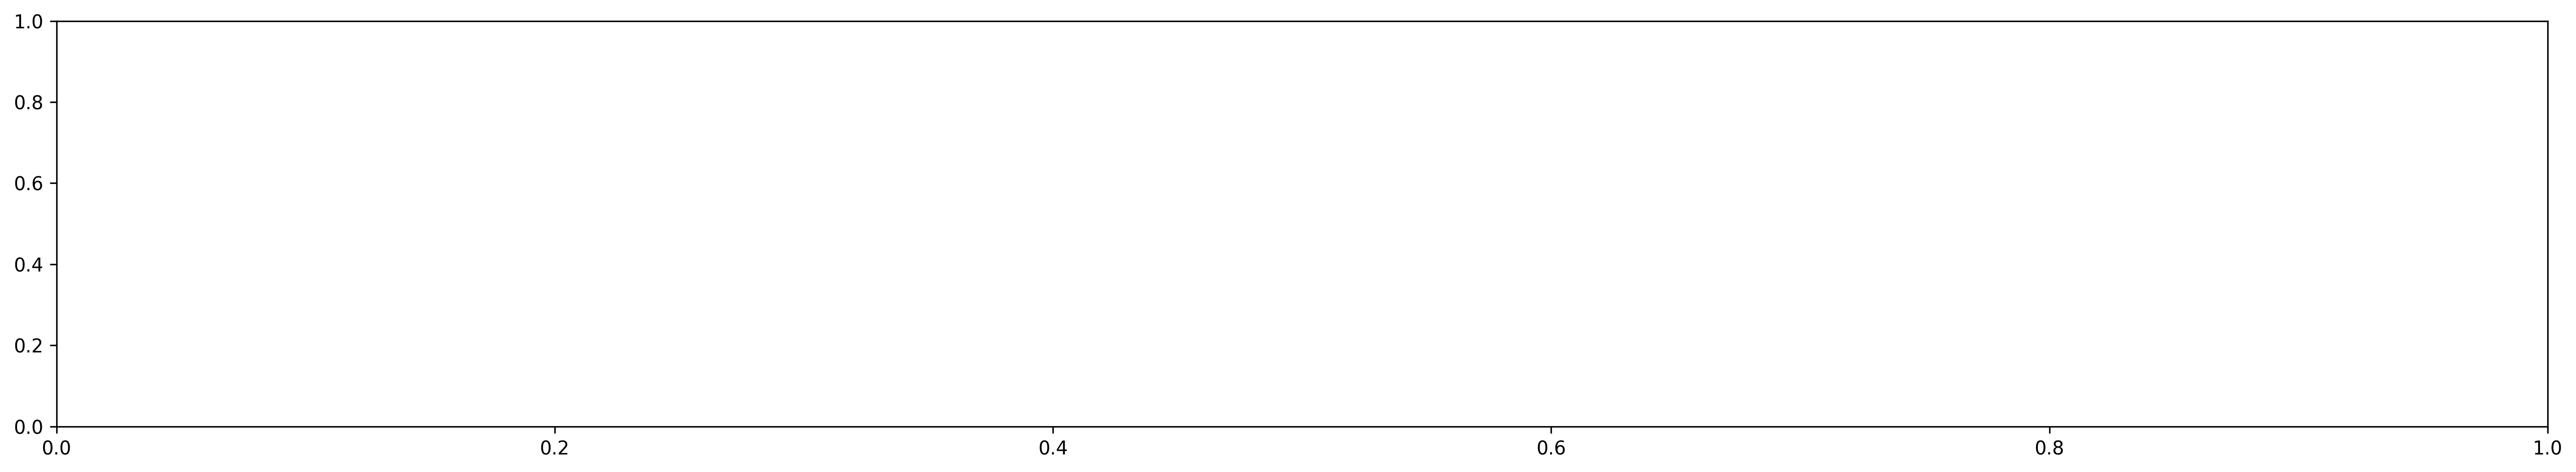

In [8]:
#matplotlib.rc('axes',edgecolor='r')
# with plt.style.context('dark_background'):
fig, ax = plt.subplots(figsize = (19.20, 3.60), tight_layout = True, dpi = 300)
data = ax.pcolormesh(hd_xlocs[:, :, -1]*10, hd_ylocs[:, :, -1], 
                     hd_qw[:, :, -1], cmap = get_continuous_cmap(realtest), 
                     norm = mcol.TwoSlopeNorm(vmin = 0, vcenter = .35, vmax = np.nanquantile(hd_qw[:, :, -1], 0.999)))
ax.set_aspect('equal')
uprbd = 1000
lwrbd = 9000
def animate(i):
#     xdomain = np.reshape(datamaster[:, 2, i], (gridy, gridx))
#     ydomain = np.reshape(datamaster[ :, 3, i] , (gridy, gridx))
#     elev = np.reshape(datamaster[:, char, i], (gridy, gridx))
    ax.clear()
    #data = ax.contourf(xdomain, ydomain, elev, levels = 500, cmap = 'gist_earth', norm=normalise)
    data = ax.pcolormesh(hd_xlocs[:, :, i]*10, hd_ylocs[:, :, i], hd_qw[:, :, i], 
                         cmap = get_continuous_cmap(realtest), 
                         norm = mcol.TwoSlopeNorm(vmin = 0, vcenter = .35, vmax = np.nanquantile(hd_qw[:, :, -1], 0.999)))
#     ax.set_ylim(llim, ulim)
    ax.set_xlim(uprbd, lwrbd)
    ax.set_title(f'timestep {(i)} ') 
    ax.set_xlabel('Streamwise Distance, m')
    ax.set_aspect('equal')
    ax.set_ylabel('Distance from centreline, m')
    ax.set_facecolor('w')
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0);  plt.margins(0, 0)

fig.colorbar(data, ax=ax, label = 'Cellular discharge, m3/s', shrink = 0.35, pad=0.02, aspect = 10)
interval = 0.002#in seconds     
ani = animation.FuncAnimation(fig, animate, int(num_timesteps), interval=interval*1e+3, blit=False)
#FFwriter = animation.FFMpegWriter()

Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
savefilesto = (f'/Volumes/SAF_Data/NAYS2DH_files/Plots/videos/w-vid-interpqw-agubh2-comps')
filesave = str(savefilesto)+'.mp4'
ani.save(filesave, writer = writer)


In [ ]:
fig, ax = plt.subplots(figsize = (19.20, 3.60), tight_layout = True, dpi = 300)
vmx = np.nanquantile(hd_qw[:, :, -1], 0.999)
data = ax.pcolormesh(hd_xlocs[:, :, -1]*10, hd_ylocs[:, :, -1], 
                     hd_qw[:, :, -1], cmap = get_continuous_cmap(realtest), 
                     norm = mcol.TwoSlopeNorm(vmin = 0, vcenter = .35, vmax = vmx))


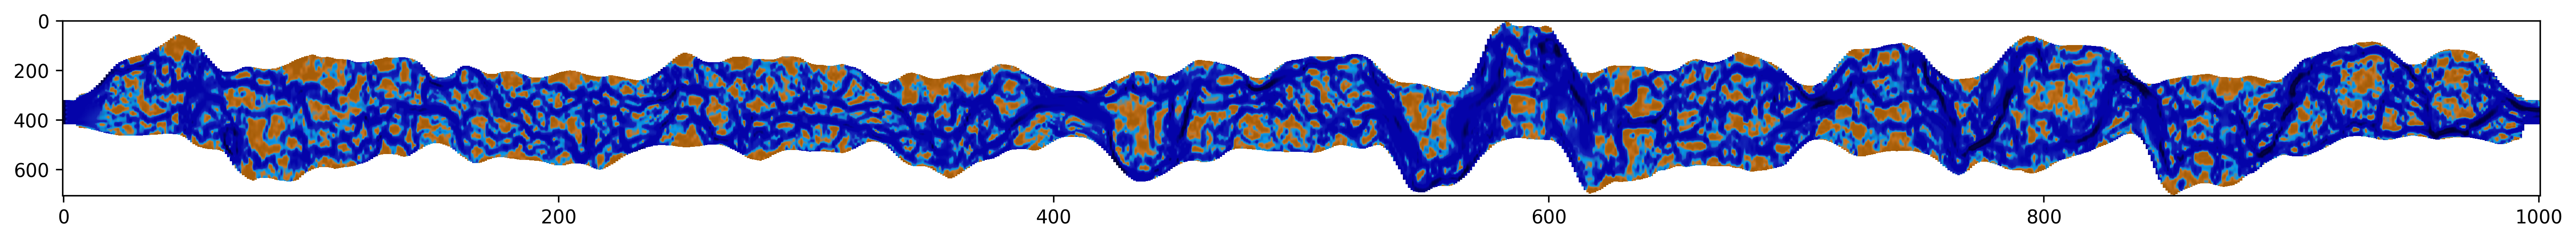

In [9]:
fig, ax = plt.subplots(figsize = (19.20, 3.60), tight_layout = True, dpi = 300)
vmx = np.nanquantile(hd_qw[:, :, -1], 0.999)
plt.imshow(hd_qw[:, :, -1], cmap = get_continuous_cmap(realtest),
           norm = mcol.TwoSlopeNorm(vmin = 0, vcenter = .35, vmax = vmx))

ax.set_aspect(.1)

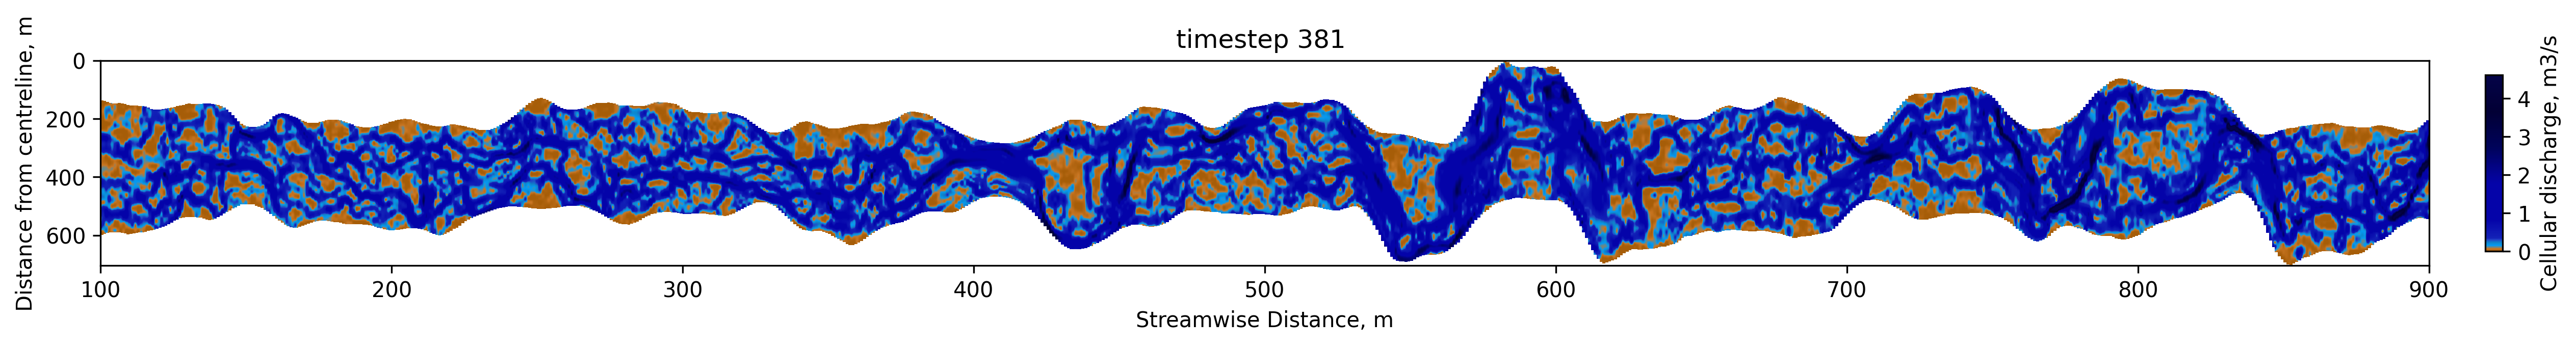

In [10]:
#matplotlib.rc('axes',edgecolor='r')
# with plt.style.context('dark_background'):
fig, ax = plt.subplots(figsize = (19.20, 3.60), tight_layout = True, dpi = 300)
vmx = np.nanquantile(hd_qw[:, :, -1], 0.999)
data = ax.imshow(hd_qw[:, :, -1], cmap = get_continuous_cmap(realtest),
           norm = mcol.TwoSlopeNorm(vmin = 0, vcenter = .35, vmax = vmx))

ax.set_aspect(.1)
uprbd = 100
lwrbd = 900
def animate(i):
#     xdomain = np.reshape(datamaster[:, 2, i], (gridy, gridx))
#     ydomain = np.reshape(datamaster[ :, 3, i] , (gridy, gridx))
#     elev = np.reshape(datamaster[:, char, i], (gridy, gridx))
    ax.clear()
    ax.imshow(hd_qw[:, :, i], cmap = get_continuous_cmap(realtest),
           norm = mcol.TwoSlopeNorm(vmin = 0, vcenter = .35, vmax = vmx))
#     ax.set_ylim(llim, ulim)
    ax.set_xlim(uprbd, lwrbd)
    ax.set_title(f'timestep {(i)} ') 
    ax.set_xlabel('Streamwise Distance, m')
    ax.set_aspect(.1)
    ax.set_ylabel('Distance from centreline, m')
    ax.set_facecolor('w')
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0);  plt.margins(0, 0)

fig.colorbar(data, ax=ax, label = 'Cellular discharge, m3/s', shrink = 0.35, pad=0.02, aspect = 10)
interval = 0.002#in seconds     
ani = animation.FuncAnimation(fig, animate, int(num_timesteps), interval=interval*1e+3, blit=False)
#FFwriter = animation.FFMpegWriter()

Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
savefilesto = (f'/Volumes/SAF_Data/NAYS2DH_files/Plots/videos/w-vid-interpqw-agubh2-comps')
filesave = str(savefilesto)+'.mp4'
ani.save(filesave, writer = writer)


In [ ]:
adjustment_time = 65
end_t = num_timesteps-1
subs = np.append(np.arange(adjustment_time, end_t+1, adjustment_time), end_t)
fig, ax = plt.subplots(int(len(subs)/2), 2, figsize = (7, 5), dpi = 300, tight_layout = True, sharex = True, sharey = True)

ax[0, 0].set_xlim(3000, 4000)
ax[0, 0].set_ylim(hd_ylocs.min(), hd_ylocs.max())

ax[-1, 0].set_xlabel('Downstream distance, m')
ax[-1, 1].set_xlabel('Downstream distance, m')
ax[1, 0].set_ylabel('Cross-stream distance, m')
ax = ax.ravel()
for a, t in zip(ax[::-1], subs):
    a.pcolormesh(hd_xlocs[:, :, t]*10, hd_ylocs[:, :, t], hd_qw[:, :, t], cmap = get_continuous_cmap(realtest), 
                 norm = mcol.TwoSlopeNorm(vmin = 0, vcenter = .35, vmax = vmx), shading = 'nearest')
    a.set_aspect('equal')
    a.set_title(f'time = {t}')
    a.xaxis.set_minor_locator(MultipleLocator(100))
    a.xaxis.set_major_locator(MultipleLocator(500))
    a.grid(axis = 'x', which = 'both', alpha = 0.25)
    
plt.savefig('/Users/safiya/Desktop/BarManuscript_2022-local/figs/python-results/3-4planform-timeseries.png')    